In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [3]:
data = pd.read_csv("transformed_housing_data_2.csv")

In [4]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
#we will work on only 2 models comprising of sale price and flat area
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price':sale_price, 'flat_area':flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


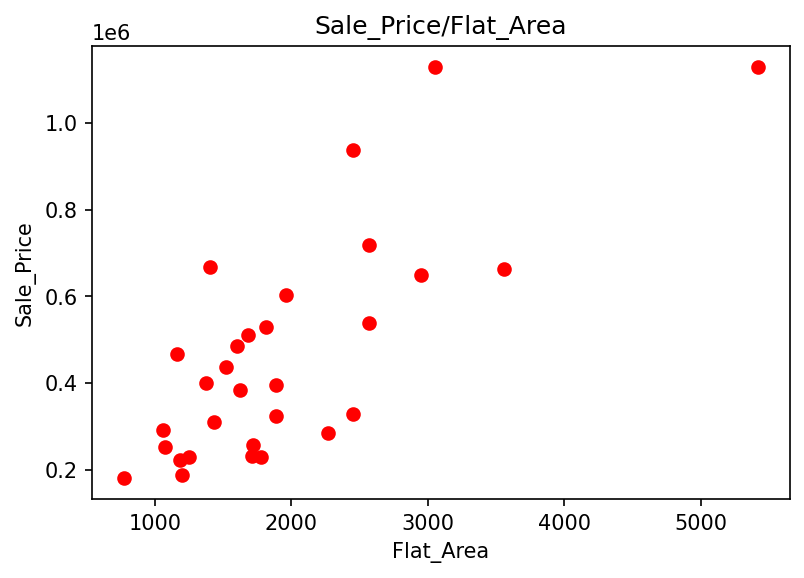

In [6]:
#for better understanding lets plot a graph

plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.show()

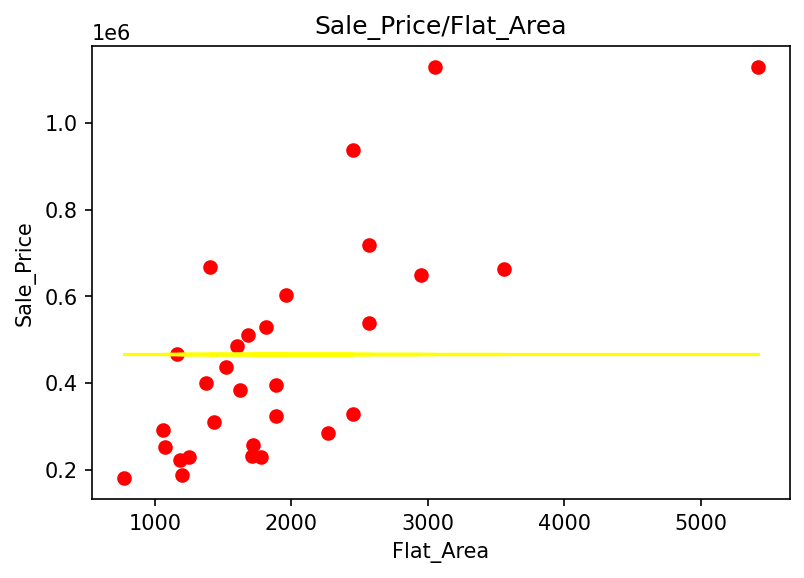

In [7]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color = 'yellow', label = 'Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.show()

In [ ]:
# this yellow line is of no use as it will tell the same price for different houses with diff flat areas
# if we draw a diagonal straight line it will will tell almost accurate prices based on sale price
# after drawing the line , "IT WILL OUR FIRST LINEAR REGRESSION MODEL"

# Cost Function Curve

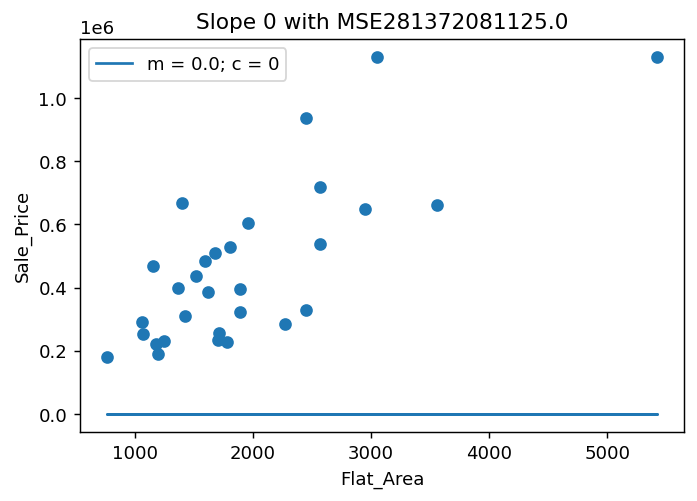

In [8]:
c = 0
m = 0
line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)
    
plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('Slope ' + str(m) + ' with MSE' + str(MSE))
plt.show()

In [ ]:
# the line models the data very poorly
# MSE is very large
# let's try increasing the slope

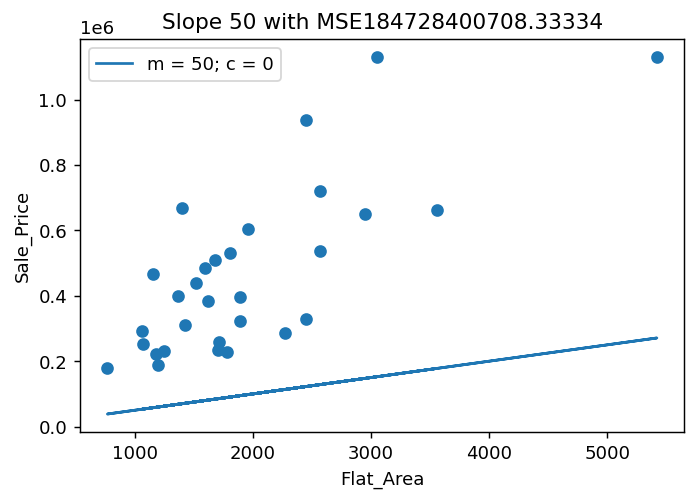

In [9]:
c = 0
m = 50
line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)
    
plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 50; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_data.sale_price, line)
plt.title('Slope ' + str(m) + ' with MSE' + str(MSE))
plt.show()

In [ ]:
# the line still  models the data very poorly
# MSE is still very large
# doing it manualy is a hit&trial method and iterative task
# so lets try to reduce our work by automating it and saving our time

In [10]:
def slope_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE
#this fuction is for finding the right value of slope m

In [11]:
slope = [i/10 for i in range(0,5000)] # value will be (0.0, 0.1,....499.9)
Cost = []
for i in slope:
    cost = slope_error(slope = i, intercept = 0, sample_data = sample_data)
    Cost.append(cost)

In [12]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'cost' : Cost
})
Cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


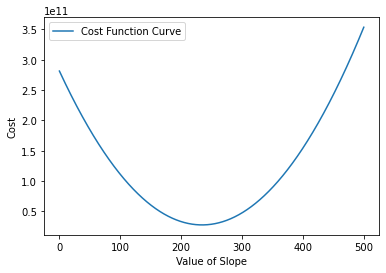

In [13]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.cost, label = 'Cost Function Curve')
plt.xlabel('Value of Slope')
plt.ylabel('Cost')
plt.legend()

In [17]:
new_slope = Cost_table['slope'][Cost_table['cost'] == Cost_table['cost'].min()].values
new_slope[0]

234.3

In [ ]:
# we are still mising the value of intercept c
# we were just considering the slope m
# considering both it will give a 3-D fig

In [18]:
def intercept_error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE
#this fuction is for finding the right value of intercept c

In [19]:
intercept = [i for i in range(5000,50000)] 
Cost = []
for i in intercept:
    cost = intercept_error(slope = 234, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [20]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'cost' : Cost
})
Cost_table.head()

,intercept,cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


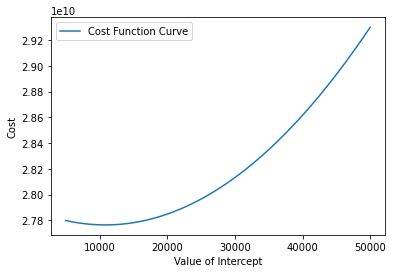

In [21]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.cost, label = 'Cost Function Curve')
plt.xlabel('Value of Intercept')
plt.ylabel('Cost')
plt.legend()

In [23]:
new_intercept = Cost_table['intercept'][Cost_table['cost'] == Cost_table['cost'].min()].values
new_intercept[0]

10834

In [ ]:
# we now have a optimal value of both m & c
# m = 234
# c = 10834
#but it is not the ideal value of both "go through notes"

In [24]:
# lets put value of c to find m
slope = [i/10 for i in range(0,5000)] # value will be (0.0, 0.1,....499.9)
Cost = []
for i in slope:
    cost = slope_error(slope = i, intercept = 10834, sample_data = sample_data)
    Cost.append(cost)

In [25]:
Cost_table = pd.DataFrame({
    'slope' : slope,
    'cost' : Cost
})
Cost_table.tail()

,slope,cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


In [26]:
new_slope = Cost_table['slope'][Cost_table['cost'] == Cost_table['cost'].min()].values
new_slope[0]

229.7

In [27]:
# we got a new value of m
# lets calculate the value of c again using new m
intercept = [i for i in range(5000,50000)] 
Cost = []
for i in intercept:
    cost = intercept_error(slope = 229.7, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [29]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'cost' : Cost
})
Cost_table.head()

,intercept,cost
0,5000,2.781305e+10
1,5001,2.781302e+10
2,5002,2.781299e+10
3,5003,2.781296e+10
4,5004,2.781293e+10


In [30]:
new_intercept = Cost_table['intercept'][Cost_table['cost'] == Cost_table['cost'].min()].values
new_intercept[0]

19199

In [31]:
# we have to repeat this cycle untill we reach a point after which the values of m and c doesn't change
# in our case it will be
# m = 219
# c = 39428
# THE BEST FIT LINE or THE BEST LINEAR REGRESSION MODEL : Y = 219X + 39428
########### " PLEASE GO THROUGH NOTES AS WELL " ##########

# Gradient Descent

In [32]:
# STEP-1
def param_init(Y):
    '''
    Y = target variable
    returns initialised values of m & c
    '''
    
    m = 0.1
    c = Y.mean()
    return m, c

In [41]:
# STEP-2
def generate_predictions(m, c, X):
    '''
    X = independent variable
    returns prediction generated by line with parameters m, c
    '''
    
    prediction = []
    for x in X:
        pred = m*x + c
        prediction.append(pred)
    return prediction

In [34]:
# Step-3
def compute_cost(prediction, Y):
    '''
    returns the mean_squared_error between Prediction & Y
    '''
    
    cost = np.sum(((prediction - Y)**2)/len(Y))
    return cost

In [35]:
# STEP-4
def gradients(prediction, Y, X):
    '''
    returns Gradients correspnding to m & c
    '''
    
    n = len(Y)
    Gm = 2/n * np.sum((prediction - Y) * X)
    Gc = 2/n * np.sum((prediction - Y))
    return Gm, Gc

In [36]:
# updating parameters
def param_update(m_old, c_old, Gm_old, Gc_old, alpha):
    '''
    update and return the new values of m & c
    '''
    
    m_new = m_old - alpha * Gm_old
    c_new = c_old - alpha * Gc_old
    
    return m_new, c_new

In [37]:
# to print the final result of GRADIENT DESCENT
def result(m, c, X, Y, cost, predictions, i):
    '''
    print and plot the final result obtained from gradient descent
    '''
    
    ##if the gradient descent converged to the obtimum value before max_iteration
    if i < max_iter - 1:
        print('********* Gradient Descent has converged at iteration {} *********'.format(i))
    else:
        print('********* Result after', max_iter, 'iteration is : *********')
        
    #### Plotting the final result
    plt.figure(figsize = (14,7), dpi = 120)
    plt.scatter(X, Y, color = 'red', label = 'data points')
    
    #### Plotting the final regression line
    label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
    plt.plot(X, predictions, color = 'green', label = label)
    plt.xlabel('Flat_Area')
    plt.ylabel('Sale_Price')
    plt.title('Final Regresion Line')
    plt.legend()

In [38]:
# Let's combine them all

After iteration  0  : m =  3499072.307222223  ; c =  465999.44299999997  ; cost =  64177937552.075005
After iteration  20  : m =  7.115927055971628e+105  ; c =  2.997778392048355e+102  ; cost =  2.7417231010181384e+208
After iteration  40  : m =  1.447154337383132e+205  ; c =  6.096532424296826e+201  ; cost =  inf
After iteration  60  : m =  2.9430538842431367e+304  ; c =  1.2398417341018387e+301  ; cost =  inf
After iteration  80  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  100  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  120  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  140  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  160  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  180  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  200  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  220  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  240  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  260  : m =  nan  ; c =  nan  

<ipython-input-34-ee6df03aef0c>:7: RuntimeWarning: overflow encountered in square
  cost = np.sum(((prediction - Y)**2)/len(Y))
<ipython-input-44-9635706c66e1>:23: RuntimeWarning: invalid value encountered in double_scalars
  if abs(cost_new - cost_old) < 10**(-7):
<ipython-input-35-90825aa848e3>:8: RuntimeWarning: overflow encountered in multiply
  Gm = 2/n * np.sum((prediction - Y) * X)
C:\Users\ABC\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-36-593c7441ba3f>:7: RuntimeWarning: invalid value encountered in double_scalars
  m_new = m_old - alpha * Gm_old
<ipython-input-36-593c7441ba3f>:8: RuntimeWarning: invalid value encountered in double_scalars
  c_new = c_old - alpha * Gc_old


After iteration  360  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  380  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  400  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  420  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  440  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  460  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  480  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  500  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  520  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  540  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  560  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  580  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  600  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  620  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  640  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  660  : m =  nan  ; c =  nan  ; cost =  nan
After iteration  680  : m =  nan  ; c = 

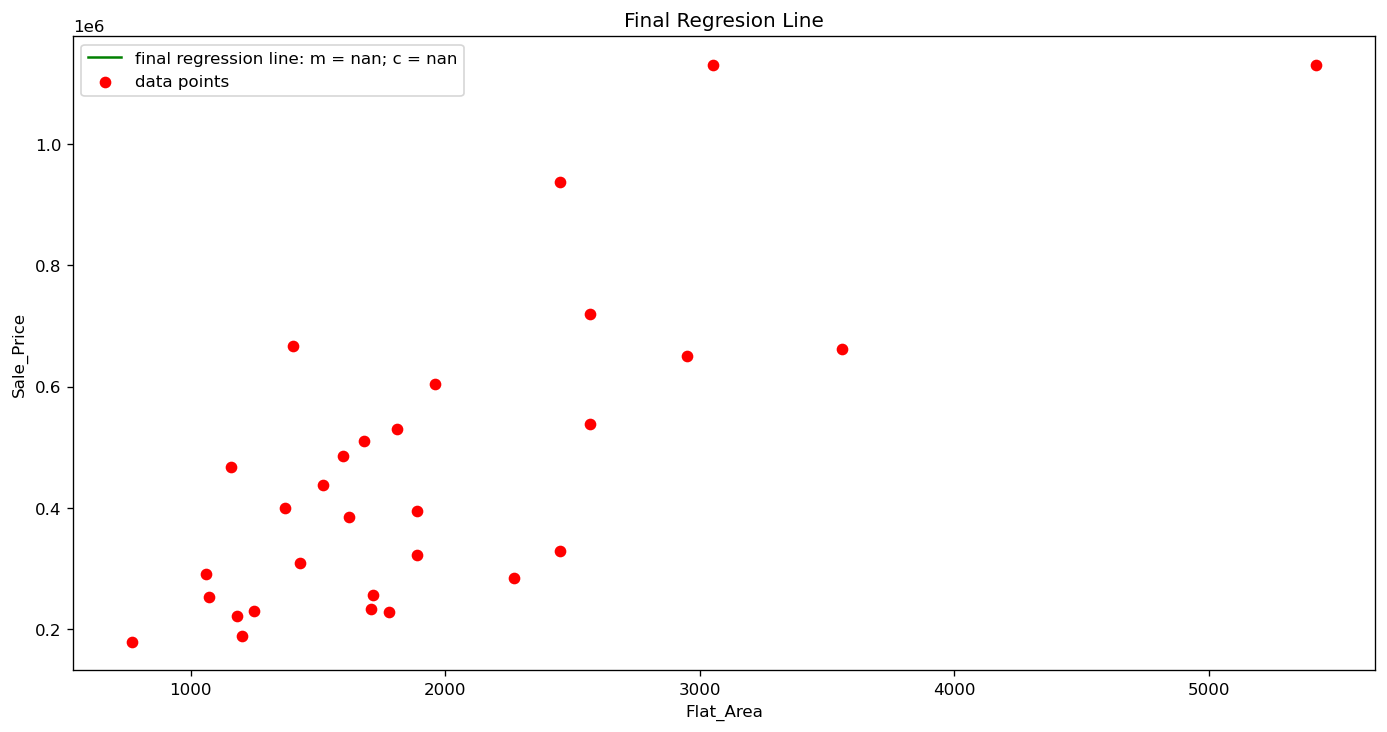

In [44]:
# defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

# declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## STEP-1 Initializing the values of m & c
m, c = param_init(sale_price)

## Gradient descent in action
for i in range(0, max_iter):
    
    ## STEP-2 Generating Predictions
    predictions = generate_predictions(m, c, flat_area)
    
    ## STEP-3 Calculating Cost
    cost_new = compute_cost(predictions, sale_price)
    
    ## Checking if gradient converged
    if abs(cost_new - cost_old) < 10**(-7):
        break;
    
    ## Calculating Gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    ## STEP-4 Updating parameters m & c
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    ## Display results after every 20 iterations
    if i%20 == 0:
        print('After iteration ', i, ' : m = ', m, ' ; c = ', c, ' ; cost = ', cost_new)
        
    ## Updating cost_old
    cost_old = cost_new
    
## Final Result
result(m, c, flat_area, sale_price, cost_new, predictions, i)

In [45]:
# we can see in 1st 3-4 lines of output that the magnitude of m, c is very high
############# THIS PROBLEM ARRISED BECAUSE WE DIDN"T SCALED OUR DATA ##############

After iteration  0  : m =  0.11316346413633305  ; c =  1.1849780416165836e-16  ; cost =  0.85836535863667
After iteration  20  : m =  0.3275595607435688  ; c =  1.240489192847842e-16  ; cost =  0.6182472245590185
After iteration  40  : m =  0.4706921039517346  ; c =  1.3248661427193537e-16  ; cost =  0.5112264752046607
After iteration  60  : m =  0.5662485308150865  ; c =  1.415904430738617e-16  ; cost =  0.46352728398628984
After iteration  80  : m =  0.6300427631414932  ; c =  1.4951003398285442e-16  ; cost =  0.4422677351921283
After iteration  100  : m =  0.6726323011945988  ; c =  1.611303683072644e-16  ; cost =  0.4327923457067555
After iteration  120  : m =  0.7010654163122192  ; c =  1.666074685620818e-16  ; cost =  0.42856916078553225
After iteration  140  : m =  0.7200475906265729  ; c =  1.6660746856208182e-16  ; cost =  0.4266868855601835
After iteration  160  : m =  0.7327202415200801  ; c =  1.669405354694694e-16  ; cost =  0.42584795473189874
After iteration  180  : m = 

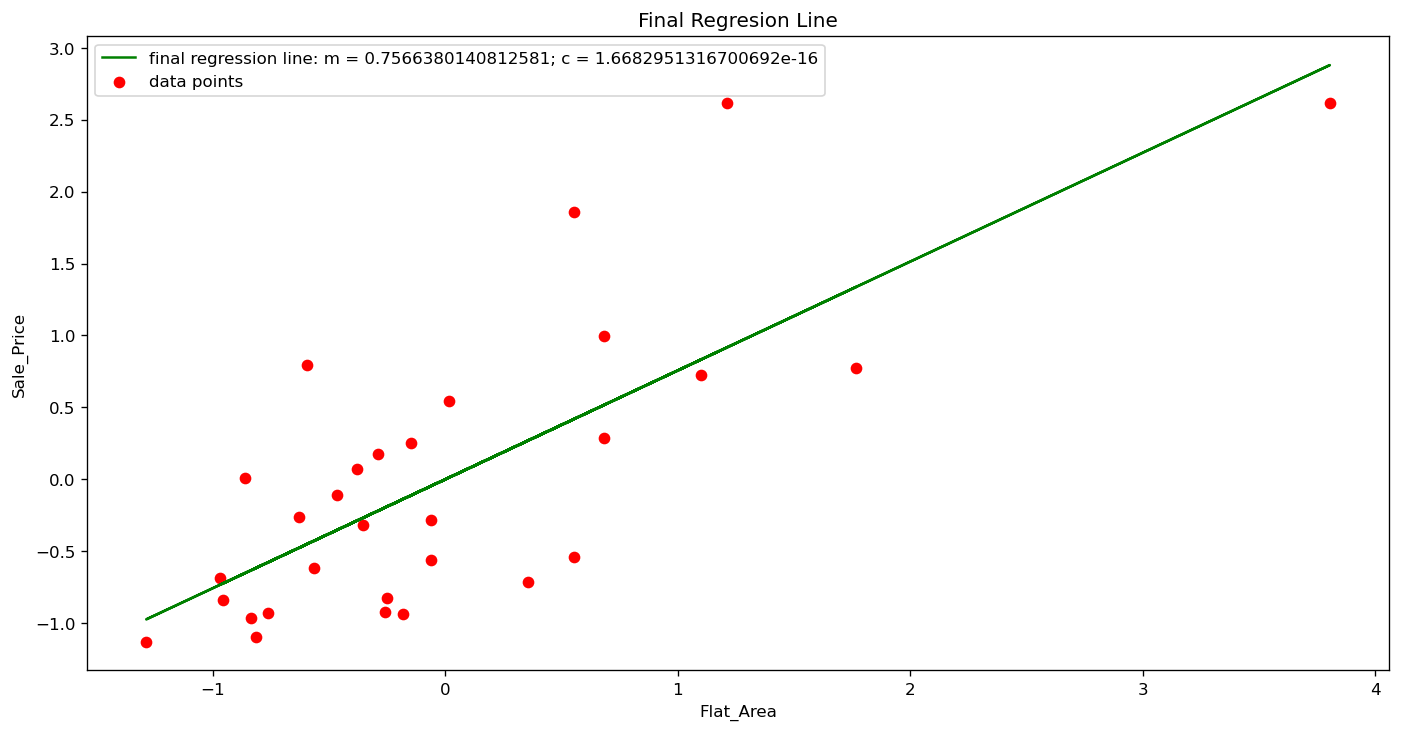

In [48]:
## Scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# defining and reshaping the dataset
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

# declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## STEP-1 Initializing the values of m & c
m, c = param_init(sale_price)

## Gradient descent in action
for i in range(0, max_iter):
    
    ## STEP-2 Generating Predictions
    predictions = generate_predictions(m, c, flat_area)
    
    ## STEP-3 Calculating Cost
    cost_new = compute_cost(predictions, sale_price)
    
    ## Checking if gradient converged
    if abs(cost_new - cost_old) < 10**(-7):
        break;
    
    ## Calculating Gradients
    Gm, Gc = gradients(predictions, sale_price, flat_area)
    
    ## STEP-4 Updating parameters m & c
    m, c = param_update(m, c, Gm, Gc, alpha)
    
    ## Display results after every 20 iterations
    if i%20 == 0:
        print('After iteration ', i, ' : m = ', m, ' ; c = ', c, ' ; cost = ', cost_new)
        
    ## Updating cost_old
    cost_old = cost_new
    
## Final Result
result(m, c, flat_area, sale_price, cost_new, predictions, i)

In [49]:
# So we can clearly see that the cost is gradually decresing after every iteration
# Values of m & c are also gradually converging to their optimal values
# Gradient Descent converged after exactly 300 iterations
# in the graph we can clearly see the final regresion line and the final parameters 
######################## GO THROUGH NOTES OF GRADIENT DESCENT TO UNDERSTAND ALL THE STEPS ###############################